In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:

Logi_UOtrain = pd.read_csv('../../dataset/Logi_trainUnderOverSampling.csv',encoding='CP949')
Logi_UOtest = pd.read_csv('../../dataset/Logi_testUnderOverSampling.csv', encoding='cp949')

In [3]:
Logi_UOtest['label'].value_counts()

0    332
1     27
Name: label, dtype: int64

In [4]:
logi_UO_x_train = Logi_UOtrain.iloc[:,:-1]
logi_UO_y_train = Logi_UOtrain['label']
logi_UO_x_test = Logi_UOtest.iloc[:,:-1]
logi_UO_y_test = Logi_UOtest['label']

In [5]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(logi_UO_x_train,logi_UO_y_train)
lda_pred = lda_clf.predict(logi_UO_x_test)
lda_pred_proba = lda_clf.predict_proba(logi_UO_x_test)

In [6]:
from sklearn.model_selection import GridSearchCV


In [7]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(logi_UO_x_train, logi_UO_y_train)
dt_pred = dt_clf.predict(logi_UO_x_test)
dt_pred_proba = dt_clf.predict_proba(logi_UO_x_test)

In [8]:
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(logi_UO_x_train, logi_UO_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.902


In [9]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 5, 'min_samples_leaf': 6}, 최적 평균 정확도 :0.896
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 8,min_samples_leaf=5)     
dt_clf_best.fit(logi_UO_x_train, logi_UO_y_train)
dt_best_pred = dt_clf_best.predict(logi_UO_x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(logi_UO_x_test)

In [10]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(logi_UO_x_train, logi_UO_y_train)
rf_pred = rf_clf.predict(logi_UO_x_test)
rf_pred_proba = rf_clf.predict_proba(logi_UO_x_test)

In [11]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8.10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(logi_UO_x_train,logi_UO_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


KeyboardInterrupt: 

In [11]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 최적 하이퍼 파라미터 :{'criterion': 'gini', 
# 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 80}
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'auto',
                                     max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60)
rf_clf_best.fit(logi_UO_x_train, logi_UO_y_train)
rf_best_pred = rf_clf_best.predict(logi_UO_x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(logi_UO_x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [12]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(logi_UO_x_train, logi_UO_y_train)
lr_pred = lr_clf.predict(logi_UO_x_test)
lr_pred_proba = lr_clf.predict_proba(logi_UO_x_test)


In [13]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,3,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(logi_UO_x_train,logi_UO_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 3, 'penalty': 'l2'}, 최적 평균 정확도:0.892


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

In [14]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 3, penalty= 'l2')
lr_clf.fit(logi_UO_x_train, logi_UO_y_train)
lr_best_pred = lr_clf.predict(logi_UO_x_test)
lr_best_pred_proba = lr_clf.predict_proba(logi_UO_x_test)

In [15]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier


# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(logi_UO_x_train, logi_UO_y_train)
# 예측

knn_pred = knn_clf.predict(logi_UO_x_test)
knn_pred_proba = knn_clf.predict_proba(logi_UO_x_test)


In [16]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(logi_UO_x_train, logi_UO_y_train)
    knn_pred = knn_clf.predict(logi_UO_x_test)
    knn_score=accuracy_score(logi_UO_y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.9303621169916435
2
0.9220055710306406
3
0.8969359331476323
4
0.9108635097493036
5
0.9052924791086351
6
0.9331476323119777
7
0.924791086350975
8
0.9415041782729805
9
0.924791086350975
10
0.9331476323119777


In [17]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=1)
# 분류기 학습
knn_clf.fit(logi_UO_x_train, logi_UO_y_train)
# 예측

knn_best_pred = knn_clf.predict(logi_UO_x_test)
knn_best_pred_proba = knn_clf.predict_proba(logi_UO_x_test)


In [18]:
logi_UO_x_train.columns

Index(['[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', '[제조]비유동자산회전률',
       '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율',
       '[제조]이자보상배율(이자비용)'],
      dtype='object')

In [19]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
logi_UO_x_train2 = logi_UO_x_train.copy()
logi_UO_x_test2 = logi_UO_x_test.copy()
logi_UO_y_train2 = logi_UO_y_train.copy()
logi_UO_y_test2 = logi_UO_y_test.copy()
logi_UO_x_train2.columns = [['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]
logi_UO_x_test2.columns = [['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(logi_UO_x_train2, logi_UO_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(logi_UO_x_test)
xgb_pred_proba = xgb_wrapper.predict_proba(logi_UO_x_test)


[13:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [28]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[110,115,120],
          'learning_rate':[0.15,0.16,0.17,0.18,0.19],
          'max_depth' : [3,4,5]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(logi_UO_x_train2,logi_UO_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

[18:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false al

In [20]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.09, 'max_depth': 10, 'n_estimators': 100}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.15, max_depth= 5, n_estimators= 115)

xgb_wrapper.fit(logi_UO_x_train2, logi_UO_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(logi_UO_x_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(logi_UO_x_test)

In [40]:
logi_UO_x_test

,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
0,-0.597888,0.276614,-0.419189,-0.000336,-0.320052,-0.414075,-0.417012,-0.085826,2.826654,-0.255649
1,-0.432662,0.491567,-0.430492,-0.911397,-0.338733,0.168859,-0.738595,-0.183592,-0.184046,-0.253358
2,-0.181903,0.154733,0.312866,-0.223576,-0.556678,0.356230,-0.638199,0.746952,-0.074163,-0.241047
3,2.323603,0.073848,-0.103798,-0.495084,-0.610646,-0.622265,0.141022,0.151908,-0.088014,-0.256540
4,0.175669,0.559156,-0.713756,-0.995866,0.894214,-0.434894,2.183548,-0.292268,-0.002831,-0.241247
...,...,...,...,...,...,...,...,...,...,...
354,0.105156,-0.244150,3.001597,0.403909,-0.421760,0.876706,-0.642673,2.647877,-0.214056,-0.261995
355,0.914595,0.242266,3.001597,0.325473,2.766467,2.084211,-0.648725,0.929079,-0.296006,-0.260068
356,1.656859,1.177424,0.963878,0.228937,-0.272312,2.146668,-0.431617,0.236861,-0.616421,-0.248357
357,-1.869625,-0.090137,-0.859069,-0.585587,0.016206,-0.726360,-0.565172,-0.646687,0.588597,-0.261559


In [42]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.1, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(logi_UO_x_train, logi_UO_y_train)
pc_pred = pc_clf.predict(logi_UO_x_test)






In [43]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(logi_UO_x_train, logi_UO_y_train)
    pc_pred = pc_clf.predict(logi_UO_x_test)
    
    pc_scores=accuracy_score(logi_UO_y_test, pc_pred)
    print(i)
    print(pc_scores)

1
0.28690807799442897
2
0.3955431754874652
3
0.3816155988857939
4
0.38997214484679665
5
0.3983286908077994
6
0.39275766016713093
7
0.3565459610027855
8
0.3955431754874652
9
0.3203342618384401
10
0.35097493036211697


In [23]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 5)
pc_clf.fit(logi_UO_x_train, logi_UO_y_train)
pc_best_pred = pc_clf.predict(logi_UO_x_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(logi_UO_y_test, pred):
    confusion = confusion_matrix(logi_UO_y_test, pred)
    accuracy = accuracy_score(logi_UO_y_test, pred)
    precision = precision_score(logi_UO_y_test, pred)
    recall = recall_score(logi_UO_y_test, pred)
    roc_score = roc_auc_score(logi_UO_y_test, pred)
    pr_score = average_precision_score(logi_UO_y_test, pred)
    f1 = f1_score(logi_UO_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(logi_UO_y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(logi_UO_y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(logi_UO_y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(logi_UO_y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(logi_UO_y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(logi_UO_y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(logi_UO_y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(logi_UO_y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(logi_UO_y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(logi_UO_y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(logi_UO_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(logi_UO_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(logi_UO_y_test, pc_best_pred))



lda
오차행렬
[[317  15]
 [  8  19]]
정확도: 0.9359, 정밀도 : 0.5588, 재현율:0.7037,F1 스코어:0.6230
ROC 스코어: 0.8293, PR score : 0.4155
None
디시전트리
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
None
디시전트리 최적의 모델
오차행렬
[[313  19]
 [ 15  12]]
정확도: 0.9053, 정밀도 : 0.3871, 재현율:0.4444,F1 스코어:0.4138
ROC 스코어: 0.6936, PR score : 0.2138
None
랜덤포레스트
오차행렬
[[327   5]
 [ 11  16]]
정확도: 0.9554, 정밀도 : 0.7619, 재현율:0.5926,F1 스코어:0.6667
ROC 스코어: 0.7888, PR score : 0.4821
None
랜덤포레스트 최적의 모델
오차행렬
[[326   6]
 [ 11  16]]
정확도: 0.9526, 정밀도 : 0.7273, 재현율:0.5926,F1 스코어:0.6531
ROC 스코어: 0.7873, PR score : 0.4616
None
로지스틱
오차행렬
[[322  10]
 [  7  20]]
정확도: 0.9526, 정밀도 : 0.6667, 재현율:0.7407,F1 스코어:0.7018
ROC 스코어: 0.8553, PR score : 0.5133
None
로지스틱회귀 최적의 모델
오차행렬
[[322  10]
 [  7  20]]
정확도: 0.9526, 정밀도 : 0.6667, 재현율:0.7407,F1 스코어:0.7018
ROC 스코어: 0.8553, PR score : 0.5133
None
Knn
오차행렬
[[323   9]
 [ 15  12]]
정확도: 0.9331, 정밀도 : 0.5714, 재현율:0.4444,F1 스코어:0.5000
ROC 스코어: 0.70

In [31]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(logi_UO_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(logi_UO_y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.1  재현율은 0.1
get_eval_by_threshold(logi_UO_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(logi_UO_y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[265  67]
 [  4  23]]
정확도: 0.8022, 정밀도 : 0.2556, 재현율:0.8519,F1 스코어:0.3932
ROC 스코어: 0.8250, PR score : 0.2288
임곗값: 0.2
오차행렬
[[301  31]
 [  6  21]]
정확도: 0.8969, 정밀도 : 0.4038, 재현율:0.7778,F1 스코어:0.5316
ROC 스코어: 0.8422, PR score : 0.3308
임곗값: 0.3
오차행렬
[[310  22]
 [  7  20]]
정확도: 0.9192, 정밀도 : 0.4762, 재현율:0.7407,F1 스코어:0.5797
ROC 스코어: 0.8372, PR score : 0.3722
임곗값: 0.4
오차행렬
[[314  18]
 [  7  20]]
정확도: 0.9304, 정밀도 : 0.5263, 재현율:0.7407,F1 스코어:0.6154
ROC 스코어: 0.8433, PR score : 0.4094
임곗값: 0.5
오차행렬
[[317  15]
 [  8  19]]
정확도: 0.9359, 정밀도 : 0.5588, 재현율:0.7037,F1 스코어:0.6230
ROC 스코어: 0.8293, PR score : 0.4155
임곗값: 0.6
오차행렬
[[322  10]
 [  9  18]]
정확도: 0.9471, 정밀도 : 0.6429, 재현율:0.6667,F1 스코어:0.6545
ROC 스코어: 0.8183, PR score : 0.4536
임곗값: 0.7
오차행렬
[[326   6]
 [ 11  16]]
정확도: 0.9526, 정밀도 : 0.7273, 재현율:0.5926,F1 스코어:0.6531
ROC 스코어: 0.7873, PR score : 0.4616
임곗값: 0.8
오차행렬
[[327   5]
 [ 14  13]]
정확도: 0.9471, 정밀도 : 0.7222, 재현율:0.4815,F1 스코어:0.5778
ROC 스코어: 0.7332, PR score : 0.3867
임곗값: 0.9

In [32]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(logi_UO_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.2
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.3
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.4
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.5
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.6
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.7
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.8
오차행렬
[[307  25]
 [ 13  14]]
정확도: 0.8942, 정밀도 : 0.3590, 재현율:0.5185,F1 스코어:0.4242
ROC 스코어: 0.7216, PR score : 0.2223
임곗값: 0.9

In [103]:
# 디시전트리 최적
# 임계값 0.2 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(logi_UO_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2029  508]
 [  11   19]]
정확도: 0.7978, 정밀도 : 0.0361, 재현율:0.6333,F1 스코어:0.0682
ROC 스코어: 0.7165, PR score : 0.0271
임곗값: 0.2
오차행렬
[[2226  311]
 [  12   18]]
정확도: 0.8742, 정밀도 : 0.0547, 재현율:0.6000,F1 스코어:0.1003
ROC 스코어: 0.7387, PR score : 0.0375
임곗값: 0.3
오차행렬
[[2304  233]
 [  12   18]]
정확도: 0.9046, 정밀도 : 0.0717, 재현율:0.6000,F1 스코어:0.1281
ROC 스코어: 0.7541, PR score : 0.0477
임곗값: 0.4
오차행렬
[[2337  200]
 [  14   16]]
정확도: 0.9166, 정밀도 : 0.0741, 재현율:0.5333,F1 스코어:0.1301
ROC 스코어: 0.7273, PR score : 0.0450
임곗값: 0.5
오차행렬
[[2340  197]
 [  15   15]]
정확도: 0.9174, 정밀도 : 0.0708, 재현율:0.5000,F1 스코어:0.1240
ROC 스코어: 0.7112, PR score : 0.0412
임곗값: 0.6
오차행렬
[[2356  181]
 [  16   14]]
정확도: 0.9233, 정밀도 : 0.0718, 재현율:0.4667,F1 스코어:0.1244
ROC 스코어: 0.6977, PR score : 0.0397
임곗값: 0.7
오차행렬
[[2451   86]
 [  18   12]]
정확도: 0.9595, 정밀도 : 0.1224, 재현율:0.4000,F1 스코어:0.1875
ROC 스코어: 0.6831, PR score : 0.0560
임곗값: 0.8
오차행렬
[[2455   82]
 [  18   12]]
정확도: 0.9610, 정밀도 : 0.1277, 재현율:0.4000,F1 스코어:0.1935
ROC 스코어: 0.

In [33]:
#로지스틱 회귀
#0.2 때 F1 스코어가 제일 좋음
get_eval_by_threshold(logi_UO_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[240  92]
 [  4  23]]
정확도: 0.7326, 정밀도 : 0.2000, 재현율:0.8519,F1 스코어:0.3239
ROC 스코어: 0.7874, PR score : 0.1815
임곗값: 0.2
오차행렬
[[281  51]
 [  5  22]]
정확도: 0.8440, 정밀도 : 0.3014, 재현율:0.8148,F1 스코어:0.4400
ROC 스코어: 0.8306, PR score : 0.2595
임곗값: 0.3
오차행렬
[[306  26]
 [  5  22]]
정확도: 0.9136, 정밀도 : 0.4583, 재현율:0.8148,F1 스코어:0.5867
ROC 스코어: 0.8683, PR score : 0.3874
임곗값: 0.4
오차행렬
[[313  19]
 [  6  21]]
정확도: 0.9304, 정밀도 : 0.5250, 재현율:0.7778,F1 스코어:0.6269
ROC 스코어: 0.8603, PR score : 0.4250
임곗값: 0.5
오차행렬
[[322  10]
 [  7  20]]
정확도: 0.9526, 정밀도 : 0.6667, 재현율:0.7407,F1 스코어:0.7018
ROC 스코어: 0.8553, PR score : 0.5133
임곗값: 0.6
오차행렬
[[327   5]
 [ 11  16]]
정확도: 0.9554, 정밀도 : 0.7619, 재현율:0.5926,F1 스코어:0.6667
ROC 스코어: 0.7888, PR score : 0.4821
임곗값: 0.7
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

In [34]:
# 로지 회귀 최적 파라미터
# 임계값 0.2일때 F1 스코어 최대
get_eval_by_threshold(logi_UO_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[242  90]
 [  4  23]]
정확도: 0.7382, 정밀도 : 0.2035, 재현율:0.8519,F1 스코어:0.3286
ROC 스코어: 0.7904, PR score : 0.1845
임곗값: 0.2
오차행렬
[[279  53]
 [  5  22]]
정확도: 0.8384, 정밀도 : 0.2933, 재현율:0.8148,F1 스코어:0.4314
ROC 스코어: 0.8276, PR score : 0.2529
임곗값: 0.3
오차행렬
[[304  28]
 [  5  22]]
정확도: 0.9081, 정밀도 : 0.4400, 재현율:0.8148,F1 스코어:0.5714
ROC 스코어: 0.8652, PR score : 0.3724
임곗값: 0.4
오차행렬
[[313  19]
 [  6  21]]
정확도: 0.9304, 정밀도 : 0.5250, 재현율:0.7778,F1 스코어:0.6269
ROC 스코어: 0.8603, PR score : 0.4250
임곗값: 0.5
오차행렬
[[322  10]
 [  7  20]]
정확도: 0.9526, 정밀도 : 0.6667, 재현율:0.7407,F1 스코어:0.7018
ROC 스코어: 0.8553, PR score : 0.5133
임곗값: 0.6
오차행렬
[[326   6]
 [ 11  16]]
정확도: 0.9526, 정밀도 : 0.7273, 재현율:0.5926,F1 스코어:0.6531
ROC 스코어: 0.7873, PR score : 0.4616
임곗값: 0.7
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.8
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.9

In [35]:
#랜덤 포레스트
# 임계값 0.3일 때 F1스코어 최대
get_eval_by_threshold(logi_UO_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[265  67]
 [  6  21]]
정확도: 0.7967, 정밀도 : 0.2386, 재현율:0.7778,F1 스코어:0.3652
ROC 스코어: 0.7880, PR score : 0.2023
임곗값: 0.2
오차행렬
[[299  33]
 [  7  20]]
정확도: 0.8886, 정밀도 : 0.3774, 재현율:0.7407,F1 스코어:0.5000
ROC 스코어: 0.8207, PR score : 0.2990
임곗값: 0.3
오차행렬
[[313  19]
 [  8  19]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7037,F1 스코어:0.5846
ROC 스코어: 0.8232, PR score : 0.3741
임곗값: 0.4
오차행렬
[[319  13]
 [  8  19]]
정확도: 0.9415, 정밀도 : 0.5938, 재현율:0.7037,F1 스코어:0.6441
ROC 스코어: 0.8323, PR score : 0.4401
임곗값: 0.5
오차행렬
[[327   5]
 [ 11  16]]
정확도: 0.9554, 정밀도 : 0.7619, 재현율:0.5926,F1 스코어:0.6667
ROC 스코어: 0.7888, PR score : 0.4821
임곗값: 0.6
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.7
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.8
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.9

In [36]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.3일 때 최대
get_eval_by_threshold(logi_UO_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[265  67]
 [  4  23]]
정확도: 0.8022, 정밀도 : 0.2556, 재현율:0.8519,F1 스코어:0.3932
ROC 스코어: 0.8250, PR score : 0.2288
임곗값: 0.2
오차행렬
[[301  31]
 [  7  20]]
정확도: 0.8942, 정밀도 : 0.3922, 재현율:0.7407,F1 스코어:0.5128
ROC 스코어: 0.8237, PR score : 0.3100
임곗값: 0.3
오차행렬
[[311  21]
 [  7  20]]
정확도: 0.9220, 정밀도 : 0.4878, 재현율:0.7407,F1 스코어:0.5882
ROC 스코어: 0.8387, PR score : 0.3808
임곗값: 0.4
오차행렬
[[320  12]
 [  8  19]]
정확도: 0.9443, 정밀도 : 0.6129, 재현율:0.7037,F1 스코어:0.6552
ROC 스코어: 0.8338, PR score : 0.4536
임곗값: 0.5
오차행렬
[[326   6]
 [ 11  16]]
정확도: 0.9526, 정밀도 : 0.7273, 재현율:0.5926,F1 스코어:0.6531
ROC 스코어: 0.7873, PR score : 0.4616
임곗값: 0.6
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.7
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

In [37]:
#knn 
#임계값 0.6일때 최대
get_eval_by_threshold(logi_UO_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[277  55]
 [  6  21]]
정확도: 0.8301, 정밀도 : 0.2763, 재현율:0.7778,F1 스코어:0.4078
ROC 스코어: 0.8061, PR score : 0.2316
임곗값: 0.2
오차행렬
[[290  42]
 [  8  19]]
정확도: 0.8607, 정밀도 : 0.3115, 재현율:0.7037,F1 스코어:0.4318
ROC 스코어: 0.7886, PR score : 0.2415
임곗값: 0.3
오차행렬
[[290  42]
 [  8  19]]
정확도: 0.8607, 정밀도 : 0.3115, 재현율:0.7037,F1 스코어:0.4318
ROC 스코어: 0.7886, PR score : 0.2415
임곗값: 0.4
오차행렬
[[309  23]
 [ 11  16]]
정확도: 0.9053, 정밀도 : 0.4103, 재현율:0.5926,F1 스코어:0.4848
ROC 스코어: 0.7617, PR score : 0.2738
임곗값: 0.5
오차행렬
[[309  23]
 [ 11  16]]
정확도: 0.9053, 정밀도 : 0.4103, 재현율:0.5926,F1 스코어:0.4848
ROC 스코어: 0.7617, PR score : 0.2738
임곗값: 0.6
오차행렬
[[325   7]
 [ 17  10]]
정확도: 0.9331, 정밀도 : 0.5882, 재현율:0.3704,F1 스코어:0.4545
ROC 스코어: 0.6746, PR score : 0.2652
임곗값: 0.7
오차행렬
[[325   7]
 [ 17  10]]
정확도: 0.9331, 정밀도 : 0.5882, 재현율:0.3704,F1 스코어:0.4545
ROC 스코어: 0.6746, PR score : 0.2652
임곗값: 0.8
오차행렬
[[330   2]
 [ 22   5]]
정확도: 0.9331, 정밀도 : 0.7143, 재현율:0.1852,F1 스코어:0.2941
ROC 스코어: 0.5896, PR score : 0.1936
임곗값: 0.9

In [109]:
#knn 최적 파라미터 적용
#임계값. 0.5
get_eval_by_threshold(logi_UO_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.2
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.3
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.4
오차행렬
[[2280  257]
 [  13   17]]
정확도: 0.8948, 정밀도 : 0.0620, 재현율:0.5667,F1 스코어:0.1118
ROC 스코어: 0.7327, PR score : 0.0402
임곗값: 0.5
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.6931, PR score : 0.0362
임곗값: 0.6
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.6931, PR score : 0.0362
임곗값: 0.7
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.6931, PR score : 0.0362
임곗값: 0.8
오차행렬
[[2333  204]
 [  16   14]]
정확도: 0.9143, 정밀도 : 0.0642, 재현율:0.4667,F1 스코어:0.1129
ROC 스코어: 0.

In [110]:
#xgb 
#입계값 0.2일 때 최대
get_eval_by_threshold(logi_UO_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2315  222]
 [  12   18]]
정확도: 0.9088, 정밀도 : 0.0750, 재현율:0.6000,F1 스코어:0.1333
ROC 스코어: 0.7562, PR score : 0.0497
임곗값: 0.2
오차행렬
[[2367  170]
 [  14   16]]
정확도: 0.9283, 정밀도 : 0.0860, 재현율:0.5333,F1 스코어:0.1481
ROC 스코어: 0.7332, PR score : 0.0513
임곗값: 0.3
오차행렬
[[2397  140]
 [  14   16]]
정확도: 0.9400, 정밀도 : 0.1026, 재현율:0.5333,F1 스코어:0.1720
ROC 스코어: 0.7391, PR score : 0.0602
임곗값: 0.4
오차행렬
[[2420  117]
 [  15   15]]
정확도: 0.9486, 정밀도 : 0.1136, 재현율:0.5000,F1 스코어:0.1852
ROC 스코어: 0.7269, PR score : 0.0627
임곗값: 0.5
오차행렬
[[2436  101]
 [  16   14]]
정확도: 0.9544, 정밀도 : 0.1217, 재현율:0.4667,F1 스코어:0.1931
ROC 스코어: 0.7134, PR score : 0.0630
임곗값: 0.6
오차행렬
[[2454   83]
 [  17   13]]
정확도: 0.9610, 정밀도 : 0.1354, 재현율:0.4333,F1 스코어:0.2063
ROC 스코어: 0.7003, PR score : 0.0653
임곗값: 0.7
오차행렬
[[2470   67]
 [  17   13]]
정확도: 0.9673, 정밀도 : 0.1625, 재현율:0.4333,F1 스코어:0.2364
ROC 스코어: 0.7035, PR score : 0.0770
임곗값: 0.8
오차행렬
[[2483   54]
 [  18   12]]
정확도: 0.9720, 정밀도 : 0.1818, 재현율:0.4000,F1 스코어:0.2500
ROC 스코어: 0.

In [111]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(logi_UO_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2290  247]
 [  10   20]]
정확도: 0.8999, 정밀도 : 0.0749, 재현율:0.6667,F1 스코어:0.1347
ROC 스코어: 0.7847, PR score : 0.0538
임곗값: 0.2
오차행렬
[[2348  189]
 [  10   20]]
정확도: 0.9225, 정밀도 : 0.0957, 재현율:0.6667,F1 스코어:0.1674
ROC 스코어: 0.7961, PR score : 0.0677
임곗값: 0.3
오차행렬
[[2395  142]
 [  13   17]]
정확도: 0.9396, 정밀도 : 0.1069, 재현율:0.5667,F1 스코어:0.1799
ROC 스코어: 0.7553, PR score : 0.0657
임곗값: 0.4
오차행렬
[[2428  109]
 [  16   14]]
정확도: 0.9513, 정밀도 : 0.1138, 재현율:0.4667,F1 스코어:0.1830
ROC 스코어: 0.7119, PR score : 0.0593
임곗값: 0.5
오차행렬
[[2448   89]
 [  17   13]]
정확도: 0.9587, 정밀도 : 0.1275, 재현율:0.4333,F1 스코어:0.1970
ROC 스코어: 0.6991, PR score : 0.0619
임곗값: 0.6
오차행렬
[[2469   68]
 [  17   13]]
정확도: 0.9669, 정밀도 : 0.1605, 재현율:0.4333,F1 스코어:0.2342
ROC 스코어: 0.7033, PR score : 0.0762
임곗값: 0.7
오차행렬
[[2481   56]
 [  18   12]]
정확도: 0.9712, 정밀도 : 0.1765, 재현율:0.4000,F1 스코어:0.2449
ROC 스코어: 0.6890, PR score : 0.0776
임곗값: 0.8
오차행렬
[[2489   48]
 [  19   11]]
정확도: 0.9739, 정밀도 : 0.1864, 재현율:0.3667,F1 스코어:0.2472
ROC 스코어: 0.

In [ ]:
# 퍼셉트론 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(logi_UO_y_test , pc_best_pred_proba[:,1].reshape(-1,1), thresholds)

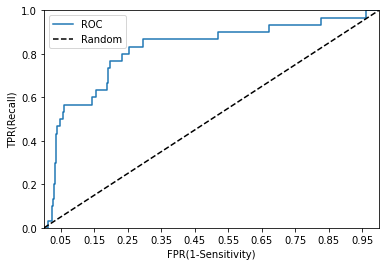

lda의 ROC AUC값: 0.8196


In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(logi_UO_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(logi_UO_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(logi_UO_y_test, lda_clf.predict_proba(logi_UO_x_test)[:,1])
pred_proba = lda_clf.predict_proba(logi_UO_x_test)[:,1]
roc_score = roc_auc_score(logi_UO_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


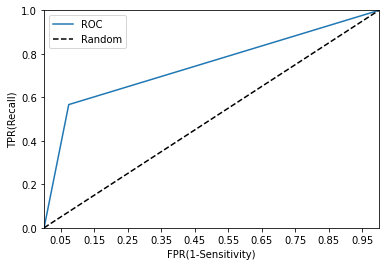

lda의 ROC AUC값: 0.7465


In [113]:
roc_curve_plot(logi_UO_y_test, lda_clf.predict(logi_UO_x_test))
roc_score = roc_auc_score(logi_UO_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

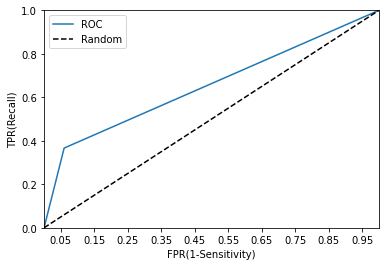

dt ROC AUC값: 0.6534


In [114]:
roc_curve_plot(logi_UO_y_test, dt_clf.predict_proba(logi_UO_x_test)[:,1])
pred_proba = dt_clf.predict_proba(logi_UO_x_test)[:,1]
roc_score = roc_auc_score(logi_UO_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


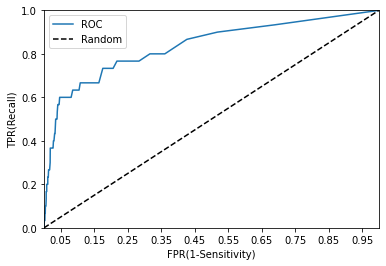

rf ROC AUC값: 0.8351


In [115]:
roc_curve_plot(logi_UO_y_test, rf_clf.predict_proba(logi_UO_x_test)[:,1])
pred_proba = rf_clf.predict_proba(logi_UO_x_test)[:,1]
roc_score = roc_auc_score(logi_UO_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

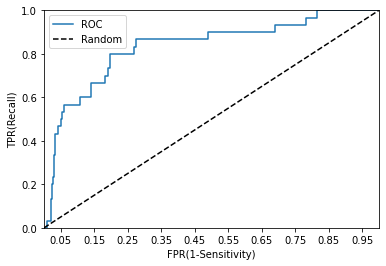

lr ROC AUC값: 0.8333


In [116]:
roc_curve_plot(logi_UO_y_test, lr_clf.predict_proba(logi_UO_x_test)[:,1])
pred_proba = lr_clf.predict_proba(logi_UO_x_test)[:,1]
roc_score = roc_auc_score(logi_UO_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


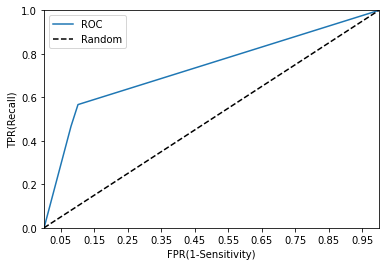

knn ROC AUC값: 0.7335


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [117]:
roc_curve_plot(logi_UO_y_test, knn_clf.predict_proba(logi_UO_x_test)[:,1])
pred_proba = knn_clf.predict_proba(logi_UO_x_test)[:,1]
roc_score = roc_auc_score(logi_UO_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))